In [2]:
## EDA
# Objective of this section is to find insights in the preprocessed data.

In [3]:
import pandas as pd

df = pd.read_csv('processed_data.csv')
df.head()

Date   Close  Change  Pct_Change   Volume  Org_Volume  \
0  2020-08-10  186000    2000        1.09  3464467     -109960   
1  2020-08-09  186000    2000        1.09  3464467     -109960   
2  2020-08-08  186000    2000        1.09  3464467     -109960   
3  2020-08-07  184000   20500       12.54  6000468     -112377   
4  2020-08-06  163500    4500        2.83  4118060      122240   

   Foreign_Volume  Foreign_Count  Foreign_Pct     DJI_Close   IR USD_Bar  \
0          -89376       22251502        24.06  27791.439453  0.5   41.94   
1          -89376       22251502        24.06  27791.439453  0.5   41.16   
2          -89376       22251502        24.06  27791.439453  0.5   41.16   
3           43102       22337710        24.16  27433.480469  0.5   41.16   
4         -139502       22293836        24.11  27386.980469  0.5   41.93   

        XR  XR_Pct_Change  
0  1185.58          -0.30  
1  1189.18           0.44  
2  1189.18           0.44  
3  1189.18           0.44  
4  1184.00          -0.19

In [4]:
corr_matrix = df.corr()
corr_matrix

# The label's (Close) correlation with other features is of interest. Features which show exceptionally low correlation to the label should be dropped. For example-> Change, Org_Volume, XR_Pct_Change have very low correlation and should be dropped.



Close    Change  Pct_Change    Volume  Org_Volume  \
Close           1.000000  0.042858    0.116043 -0.361348    0.022899   
Change          0.042858  1.000000    0.137223  0.447009    0.033090   
Pct_Change      0.116043  0.137223    1.000000  0.191379    0.527065   
Volume         -0.361348  0.447009    0.191379  1.000000    0.034007   
Org_Volume      0.022899  0.033090    0.527065  0.034007    1.000000   
Foreign_Volume  0.253817  0.066013    0.459314 -0.163274   -0.030811   
Foreign_Count   0.580217 -0.051532    0.020005 -0.561511    0.007449   
Foreign_Pct     0.580165 -0.051529    0.019985 -0.561502    0.007429   
DJI_Close       0.397209  0.011320    0.009330  0.049551   -0.020408   
IR              0.458604 -0.024682   -0.046106 -0.499573    0.038118   
XR             -0.739806 -0.016124   -0.062974  0.333205    0.016434   
XR_Pct_Change  -0.051778 -0.033220   -0.164429 -0.007569   -0.038088   

                Foreign_Volume  Foreign_Count  Foreign_Pct  DJI_Close  \
Close                 0.253817       0.580217     0.580165   0.397209   
Change                0.066013      -0.051532    -0.051529   0.011320   
Pct_Change            0.459314       0.020005     0.019985   0.009330   
Volume               -0.163274      -0.561511    -0.561502   0.049551   
Org_Volume           -0.030811       0.007449     0.007429  -0.020408   
Foreign_Volume        1.000000       0.318562     0.318564  -0.145790   
Foreign_Count         0.318562       1.000000     1.000000  -0.360128   
Foreign_Pct           0.318564       1.000000     1.000000  -0.360178   
DJI_Close            -0.145790      -0.360128    -0.360178   1.000000   
IR                    0.142602       0.639641     0.639603  -0.008477   
XR                   -0.217748      -0.658718    -0.658699  -0.108036   
XR_Pct_Change        -0.072408      -0.002169    -0.002159  -0.049506   

                      IR        XR  XR_Pct_Change  
Close           0.458604 -0.739806      -0.051778  
Change         -0.024682 -0.016124      -0.033220  
Pct_Change     -0.046106 -0.062974      -0.164429  
Volume         -0.499573  0.333205      -0.007569  
Org_Volume      0.038118  0.016434      -0.038088  
Foreign_Volume  0.142602 -0.217748      -0.072408  
Foreign_Count   0.639641 -0.658718      -0.002169  
Foreign_Pct     0.639603 -0.658699      -0.002159  
DJI_Close      -0.008477 -0.108036      -0.049506  
IR              1.000000 -0.372785       0.026221  
XR             -0.372785  1.000000       0.097230  
XR_Pct_Change   0.026221  0.097230       1.000000

<Figure size 432x288 with 0 Axes>

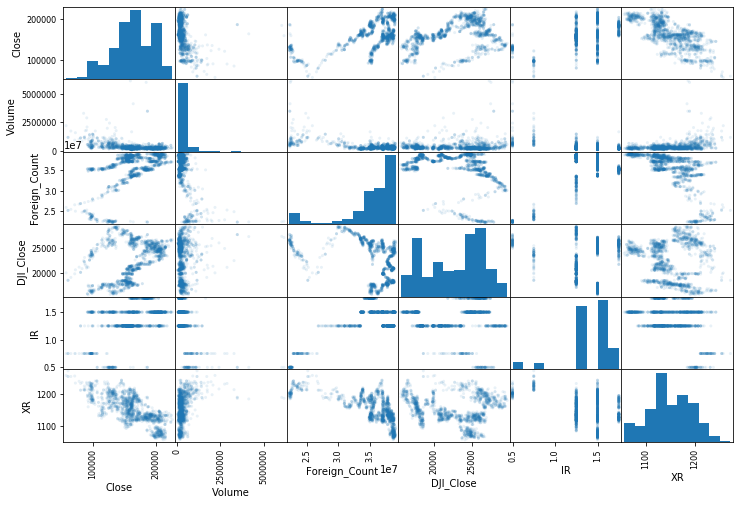

In [40]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ['Close','Volume','Foreign_Count','DJI_Close','IR','XR']
pd.plotting.scatter_matrix(df[attributes],figsize=(12,8),alpha=0.1)
plt.show();

In [6]:
### The scatter plot reveals a lot about the relationship between the features and label. Amongst the plots, there seems to be a strong postivie linear correlation between Foreign_Count, DJI_Close and Close, whilst a strong negative correlation between XR and Close. For Volume, it is less obvious, but there exists a negative linear trend with Close. As for IR, there exists specific regions of IR values shown as a group points in a '|' shape, and there seems to be linearity between increasing IR and higher Close prices.

In [7]:
drop_cols = ['Change', 'Org_Volume', 'XR_Pct_Change']
df.drop(drop_cols,axis=1,inplace=True)
df.head()

Date   Close  Pct_Change   Volume  Foreign_Volume  Foreign_Count  \
0  2020-08-10  186000        1.09  3464467          -89376       22251502   
1  2020-08-09  186000        1.09  3464467          -89376       22251502   
2  2020-08-08  186000        1.09  3464467          -89376       22251502   
3  2020-08-07  184000       12.54  6000468           43102       22337710   
4  2020-08-06  163500        2.83  4118060         -139502       22293836   

   Foreign_Pct     DJI_Close   IR USD_Bar       XR  
0        24.06  27791.439453  0.5   41.94  1185.58  
1        24.06  27791.439453  0.5   41.16  1189.18  
2        24.06  27791.439453  0.5   41.16  1189.18  
3        24.16  27433.480469  0.5   41.16  1189.18  
4        24.11  27386.980469  0.5   41.93  1184.00

In [8]:
### There are no categorical variables to encode and transformation pipelines are not needed because the data was preprocessed in the data_preprocessing step. In hindsight, the usage of pipelines may provide cleaner code with very scalability, but at this point, for this specific project, using it would be redundant and a waste of resources.

In [9]:
## Feature Scaling
### Standarization vs Normalization?
### Standarization is much less prone to outliers, but in this specific case, some variable changes such as closing price or volume may have sudden extreme changes following a series of events (such as an earnings report/significant news). Therefore, these extremes may be regarded as outliers in standaization, and this is not desired. Extremes must be included in the data to allow a better prediction of the stock price movement. Therefore, normalization should be used for feature scaling.

# Copy the df for testing purposes
df_test = df
df_test = df_test.set_index(['Date'])
df_test['USD_Bar'] = pd.to_numeric(df_test['USD_Bar'], errors='coerce')
df_test['USD_Bar'].dtype
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1828 entries, 2020-08-10 to 2015-08-10
Data columns (total 10 columns):
Close             1828 non-null int64
Pct_Change        1828 non-null float64
Volume            1828 non-null int64
Foreign_Volume    1828 non-null int64
Foreign_Count     1828 non-null int64
Foreign_Pct       1828 non-null float64
DJI_Close         1828 non-null float64
IR                1828 non-null float64
USD_Bar           1757 non-null float64
XR                1828 non-null float64
dtypes: float64(6), int64(4)
memory usage: 157.1+ KB


Close  Pct_Change   Volume  Foreign_Volume  Foreign_Count  \
Date                                                                     
2020-08-10  186000        1.09  3464467          -89376       22251502   
2020-08-09  186000        1.09  3464467          -89376       22251502   
2020-08-08  186000        1.09  3464467          -89376       22251502   
2020-08-07  184000       12.54  6000468           43102       22337710   
2020-08-06  163500        2.83  4118060         -139502       22293836   

            Foreign_Pct     DJI_Close   IR  USD_Bar       XR  
Date                                                          
2020-08-10        24.06  27791.439453  0.5    41.94  1185.58  
2020-08-09        24.06  27791.439453  0.5    41.16  1189.18  
2020-08-08        24.06  27791.439453  0.5    41.16  1189.18  
2020-08-07        24.16  27433.480469  0.5    41.16  1189.18  
2020-08-06        24.11  27386.980469  0.5    41.93  1184.00

In [10]:
from sklearn import preprocessing

# Min-Max Standardized df_norm
x = df_test.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_norm = pd.DataFrame(x_scaled)

df_norm.columns = ['Close', 'Pct_Change', 'Volume', 'Foreign_Volume', 'Foreign_Count',
       'Foreign_Pct', 'DJI_Close', 'IR', 'USD_Bar', 'XR']

df_norm.head()

Close  Pct_Change    Volume  Foreign_Volume  Foreign_Count  Foreign_Pct  \
0  0.765161    0.458805  0.560828        0.588727       0.004502     0.004367   
1  0.765161    0.458805  0.560828        0.588727       0.004502     0.004367   
2  0.765161    0.458805  0.560828        0.588727       0.004502     0.004367   
3  0.753270    0.717972  0.978587        0.724501       0.009591     0.009825   
4  0.631391    0.498189  0.668495        0.537354       0.007001     0.007096   

   DJI_Close   IR   USD_Bar        XR  
0   0.873303  0.0  0.689920  0.599101  
1   0.873303  0.0  0.683102  0.615610  
2   0.873303  0.0  0.683102  0.615610  
3   0.847534  0.0  0.683102  0.615610  
4   0.844187  0.0  0.689833  0.591855

In [11]:
# Check for null values and fill using forward fill.

df_norm.isnull().any()
df_norm = df_norm.fillna(method='ffill')

# same for df_test (non-normalized dataset)
df_test = df_test.fillna(method='ffill')

In [12]:
## Selecting and Training a model

In [13]:
# Split the data into training and testing datasets

from sklearn.model_selection import train_test_split

features = df_test.drop("Close", axis=1) # drop labels for training set
labels = df_test["Close"].copy()

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.1 ,random_state=41)

X_train.shape

(1645, 9)

In [14]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print("Predictions:", lin_reg.predict(X_test))

Predictions: [196609.43064311 168537.74796778 135383.26115238 147009.00692281
 143102.6280458  173616.22825896 164077.33113184 167323.85465277
 134211.82509517 204280.77643051 131444.16529194 177361.47622901
 117888.77985834 176916.21906418 139387.78323836 117810.1541925
 128008.4155557  167689.40694401 172355.708166   191538.26719441
 106898.42874111 152202.33942387 189893.49266543 173642.62242442
 171112.11677814 174180.57375048 172444.82166867 191601.07730237
 161711.37274009 145373.70070067 129551.88200111 177158.43567444
 149389.39965627 205794.540845   188184.21048104 198740.67444344
 176883.96184911 169135.11368616 156829.77172298 145542.51751301
 180194.83597932 177360.05491318 185522.96164316 165689.39924702
 178296.77993131 174825.65445487 175772.72243753 113607.37968297
 156804.24445771 176747.42126458 172258.74832805 146679.01658639
 177012.0148587  171229.70884543 170353.93591941 162369.26080549
 191928.86815482 200331.24917218 134507.82701868 169226.4480204
 191112.677649

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

stock_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, stock_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

14830.572544010402

In [17]:
# 14830 KRW is roughly in the 10% range of the stock price. It's not bad, but maybe other models can fit better.

In [18]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, stock_predictions)
lin_mae

12055.528450679978

In [19]:
# To choose which metric to test the error (although it depends on the loss function), RMSE or MAE were considered, but RMSE gives more weight to points further away from mean, and should be reference in this particular stock scenario.

In [20]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=41)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=41, splitter='best')

In [21]:
stock_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, stock_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4859.310257110919

In [22]:
# The RMSE is much lower, which may either indicate overfitting or a better model.

In [23]:
# Test using cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Decision Tree RMSE Scores
display_scores(tree_rmse_scores)

Scores: [4339.38970713 4893.5331476  6557.32299406 4685.45137051 4961.02995172
 5040.28285114 4242.69098913 4132.05051559 4338.07589134 4540.88473167]
Mean: 4773.071214990048
Standard deviation: 666.0251599318477


In [25]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

# Linear Regression RMSE Scores
display_scores(lin_rmse_scores)

Scores: [14534.54614638 14662.81307875 15405.34455884 13890.47581176
 13416.49286242 14063.48471564 14058.48923605 14284.07079354
 14407.81312852 14590.2461248 ]
Mean: 14331.377645671673
Standard deviation: 505.6944064547551


In [26]:
# The Decision Tree Regressor seems to be a more promising model, but there are more models to try.

In [27]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=41)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=41, verbose=0,
                      warm_start=False)

In [28]:
stock_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, stock_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3566.0452678645315

In [29]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [3161.75714092 3703.16522353 4465.37262485 3544.07547546 3331.58408405
 2796.81758716 3126.86495961 2833.21441489 2794.1192829  3350.8347422 ]
Mean: 3310.780553556336
Standard deviation: 485.6656633176734


In [30]:
# Random forest regressor is the best until now. The score on training and validation sets are very similar and hence there should be no overfitting. If the score on the training set is much lower than that of the validation set, the data may be overfit, but in this case, it seems that the data is not overfitting (and no underfitting).

In [31]:
# Now that we know the Random Forest Regressor has the lowest RMSE, lets fine-tune the parameters to get an even lower RMSE.

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [False], 'n_estimators': [5,10,100], 'max_features': [5, 7, 9]},
  ]

forest_reg = RandomForestRegressor(random_state=41)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=41,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [False], 'max_featu

In [32]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 5, 'n_estimators': 100}

In [33]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=41, verbose=0,
                      warm_start=False)

In [34]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [35]:
print("Final RMSE:",final_rmse)

Final RMSE: 3493.680056730698


In [36]:
# After using the GridSearchCV to search for the best parameters and using those parameters, the final RMSE is the lowest amongst all methods tried.